# Exploratory Data Analysis for Recidivism Dataset

## Step 0: Prepare a `MyPyTable` object with the cleaned Recidivism Dataset

In [30]:
import os
from mysklearn.mypytable import MyPyTable
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

filename = os.path.join("data", "cleaned-recidivism-data-NA.csv")
table = MyPyTable()
table.load_from_file(filename)

## Step 1: Frequency Diagrams
Create frequency diagrams for selected attributes

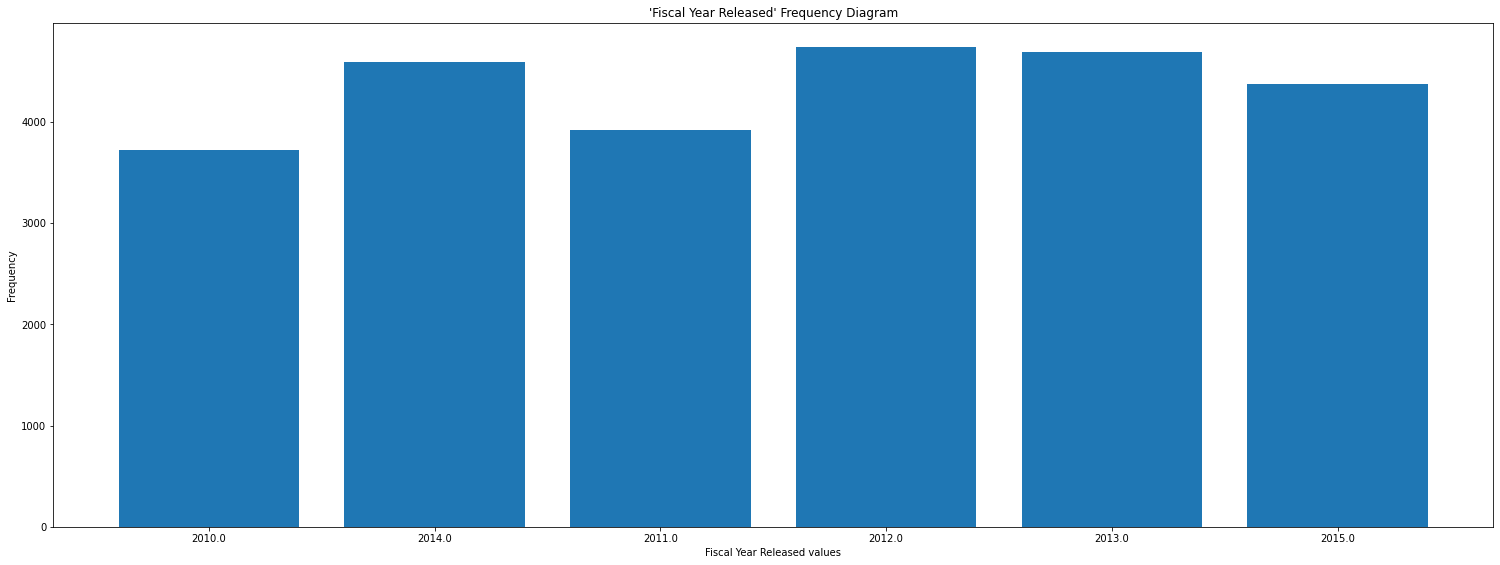

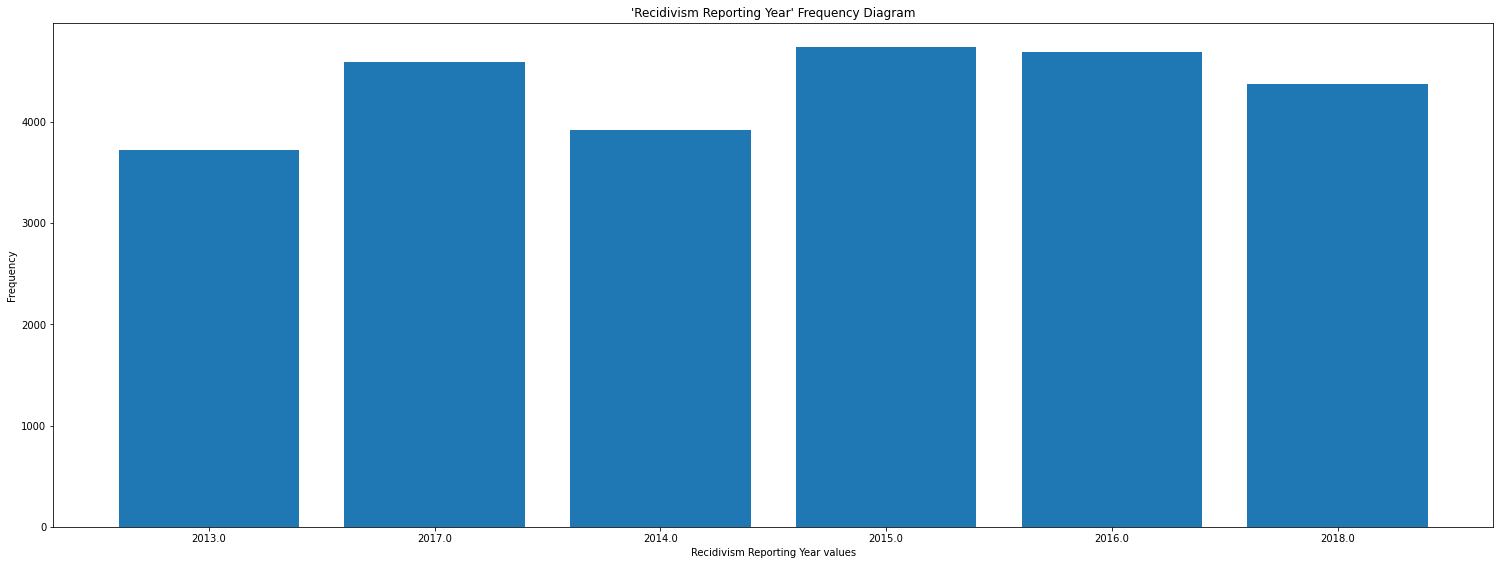

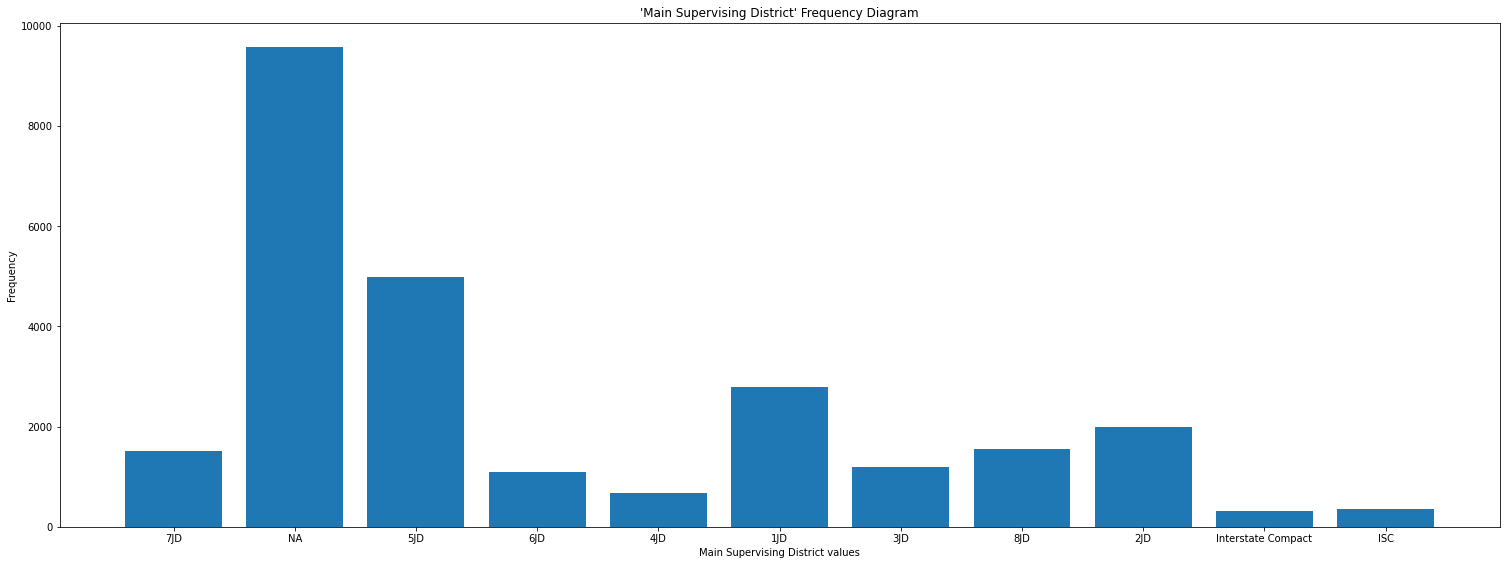

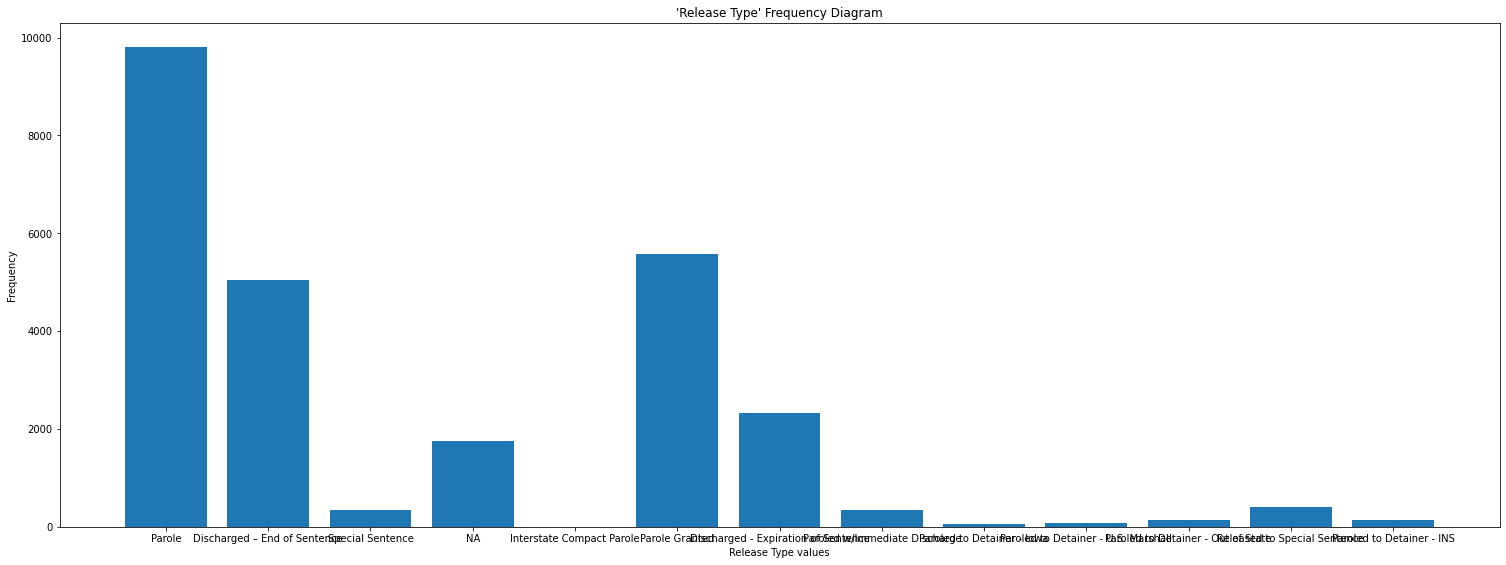

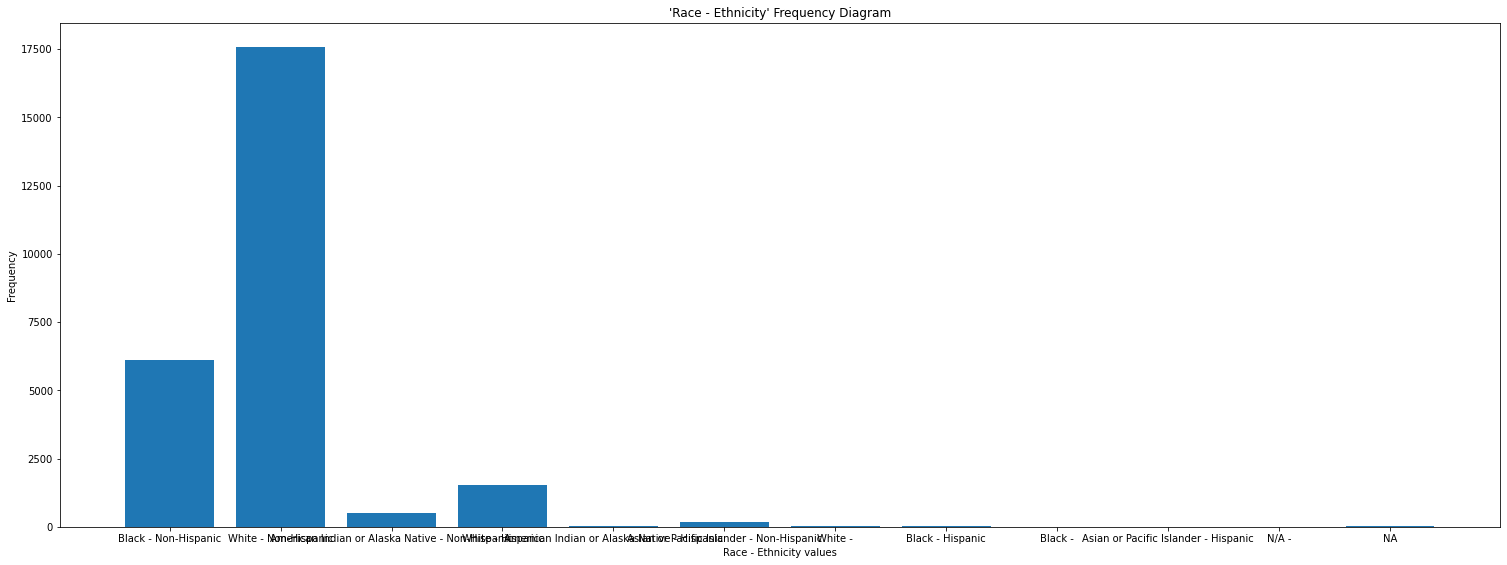

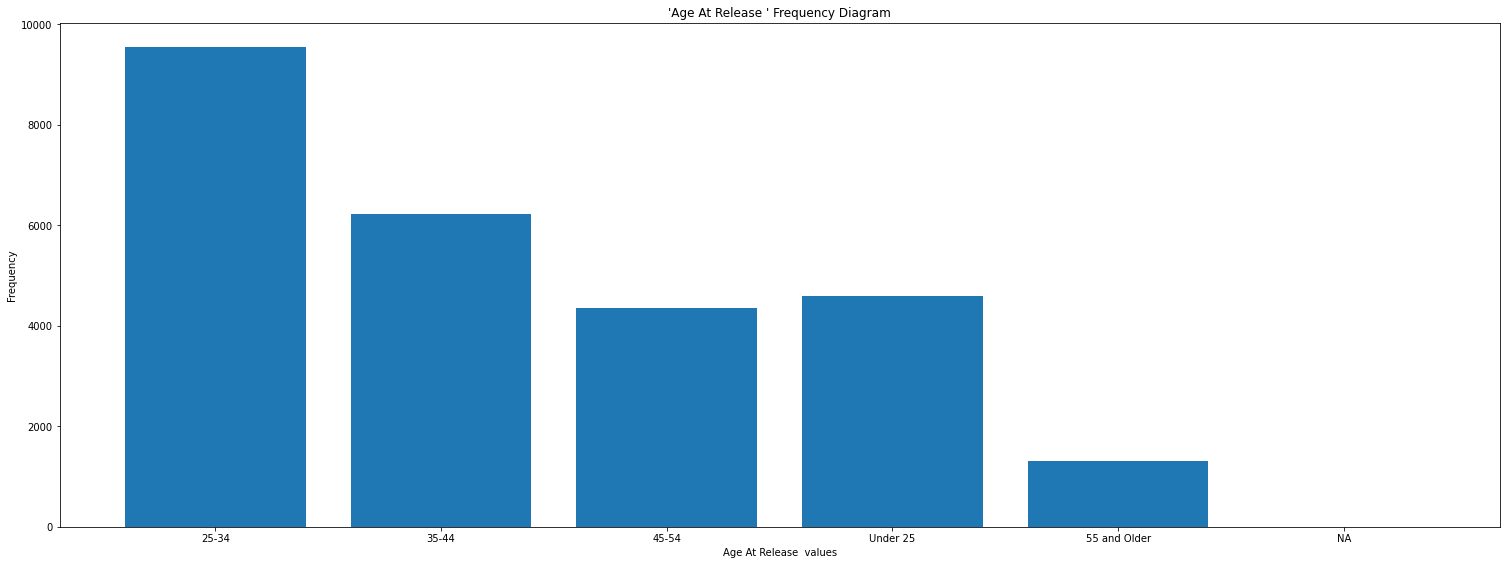

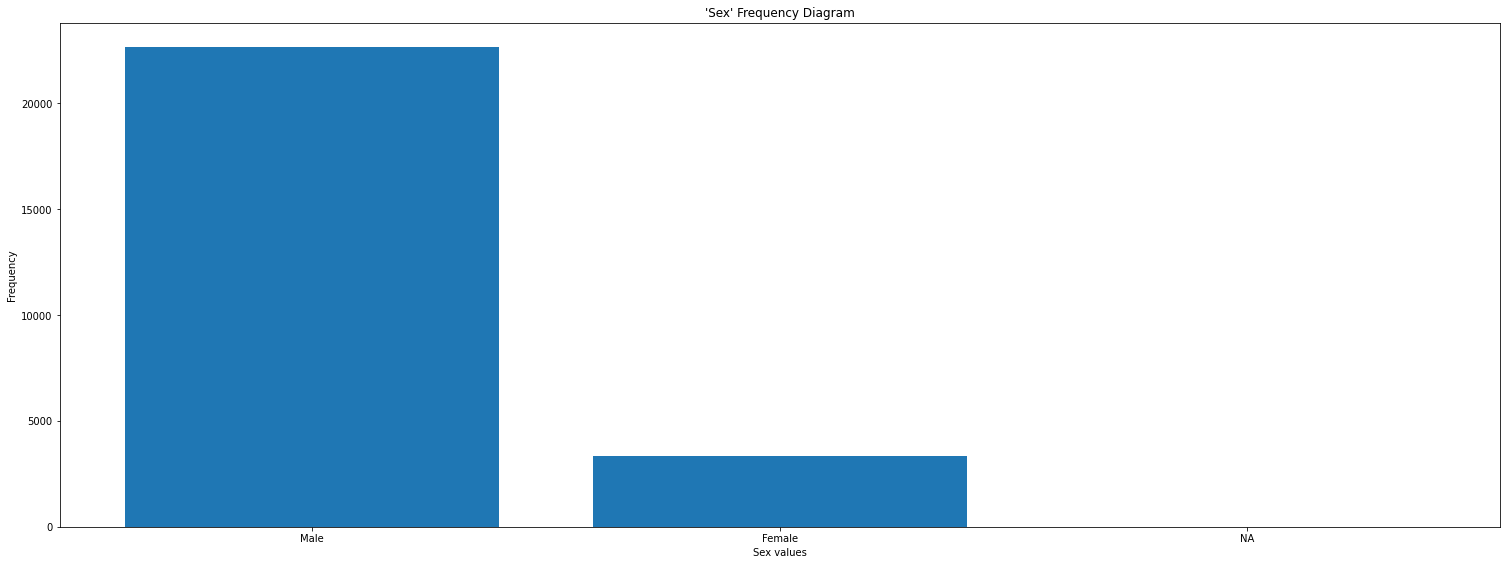

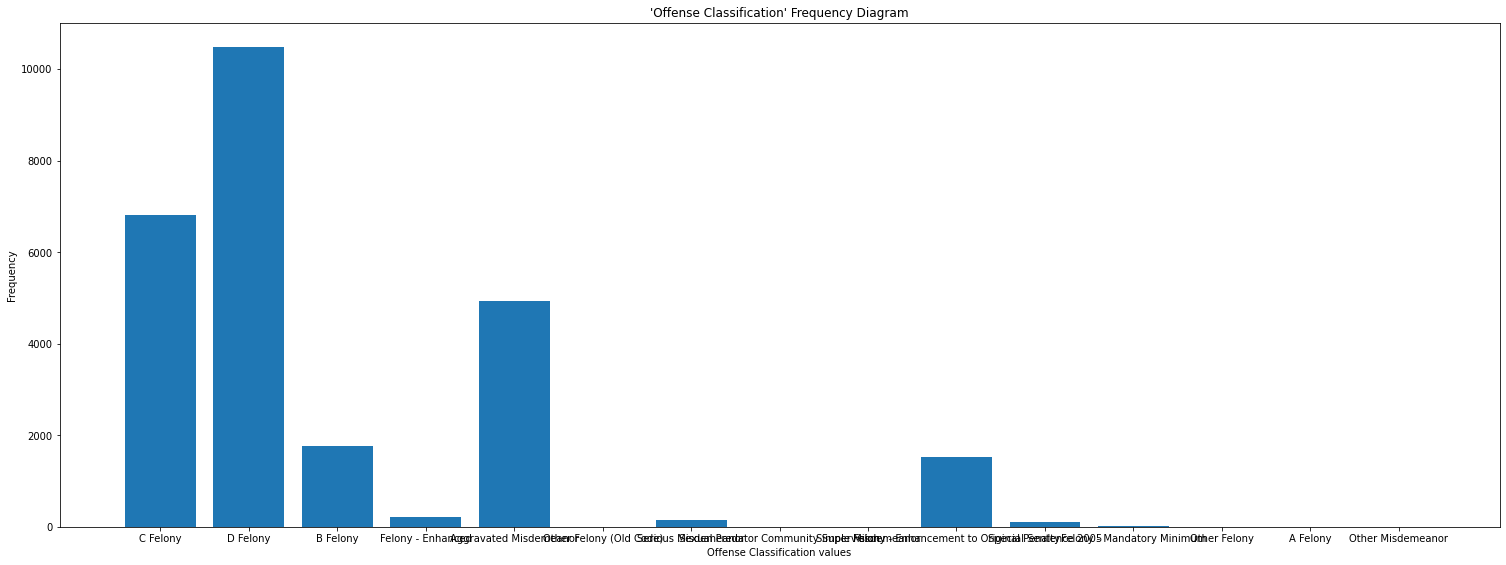

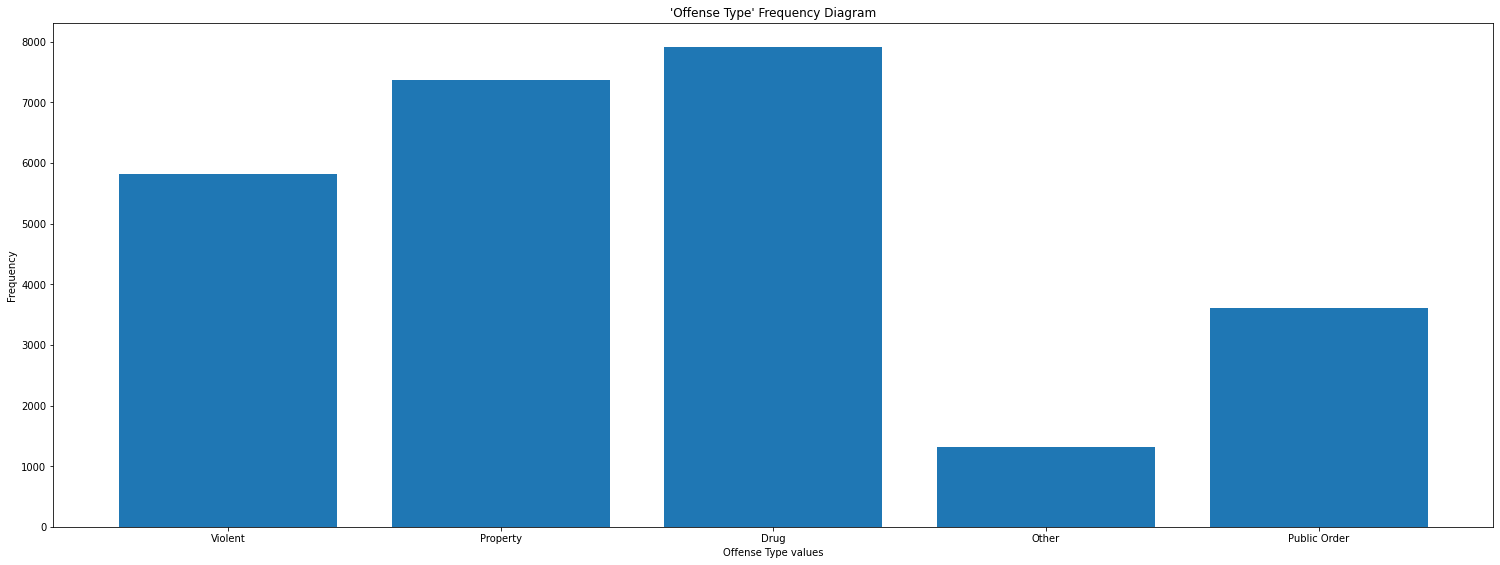

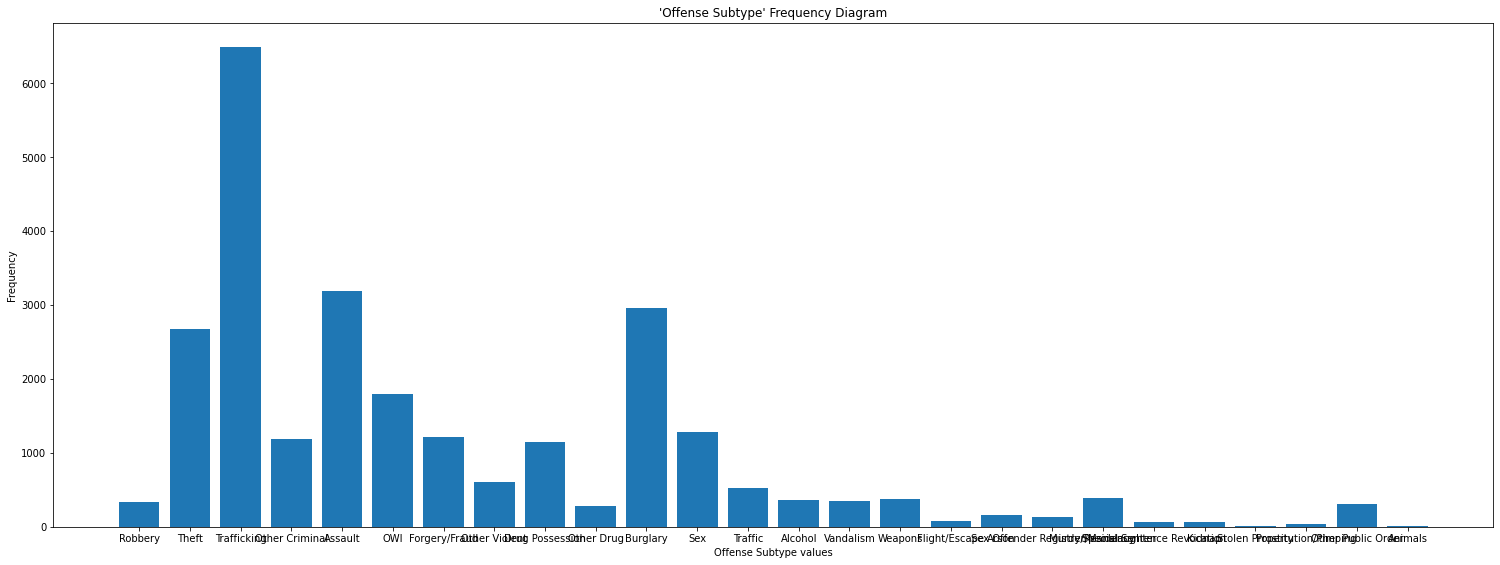

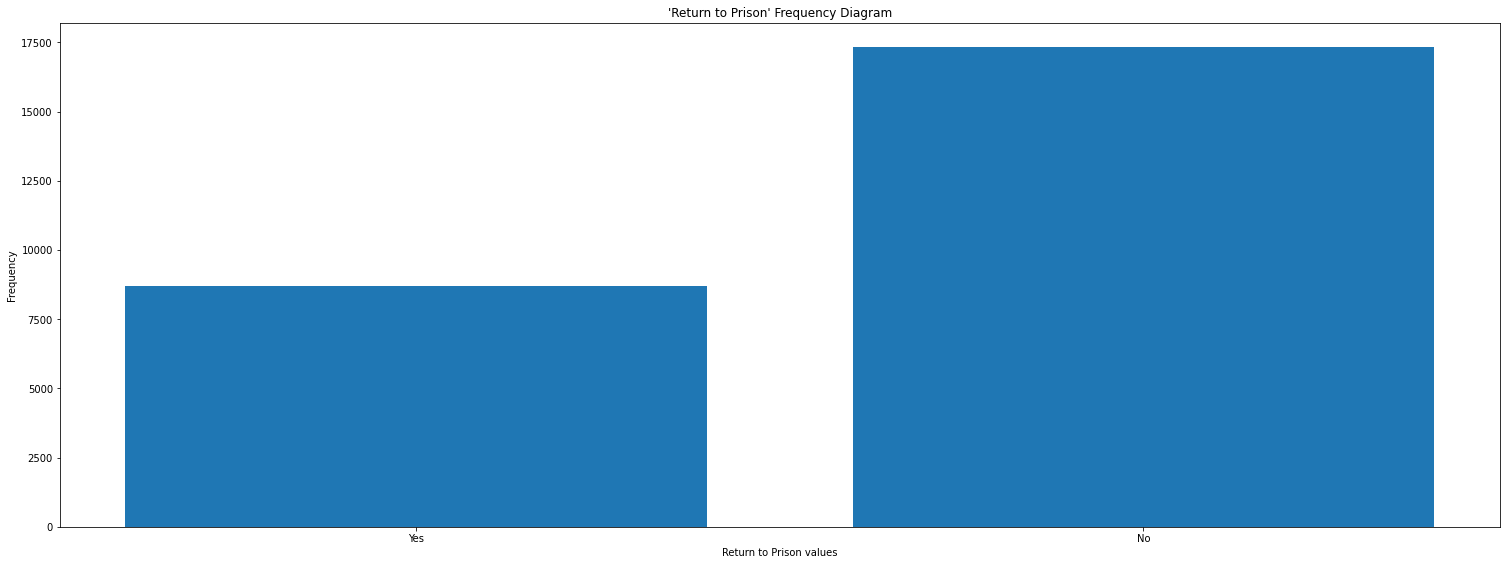

In [31]:
import plot_utils

for column_name in table.column_names:
    attribute_frequencies = table.get_column_frequency(column_name, include_missing_values=True)
    title = f"'{column_name}' Frequency Diagram"
    x_label = f"{column_name} values"
    y_label = "Frequency"
    x_values = attribute_frequencies.keys()
    y_values = attribute_frequencies.values()
    plot_utils.create_frequency_diagram(x_values, y_values, title, x_label, y_label)

## Step 2: Histograms
Create histograms for selected attributes

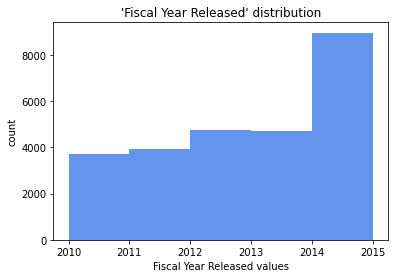

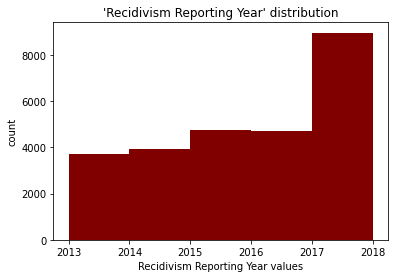

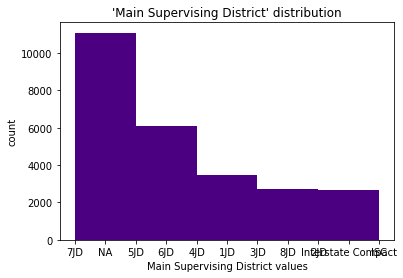

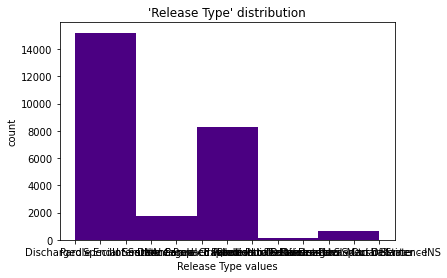

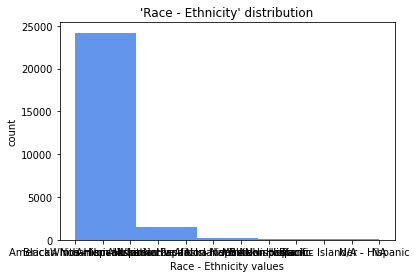

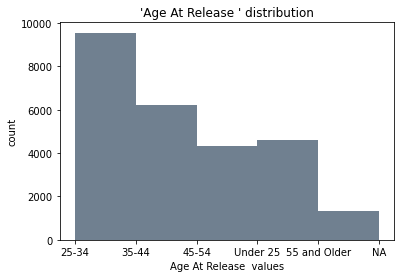

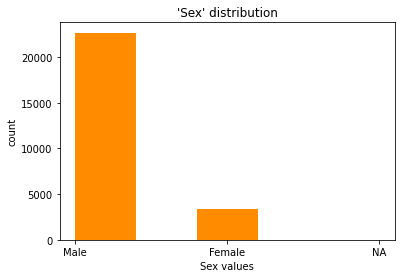

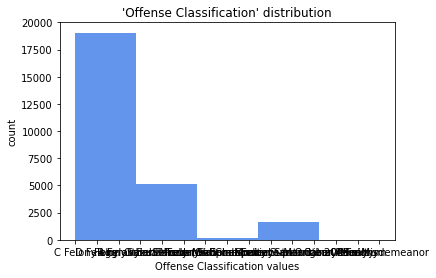

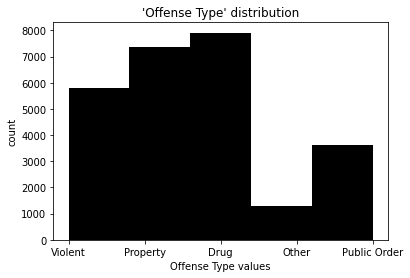

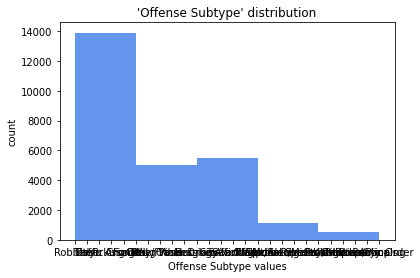

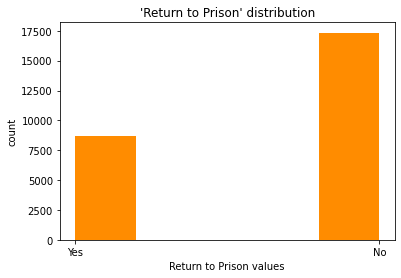

In [32]:
colors = ['black', 'lightcoral', 'darkorange', 'maroon', 'slategrey', 'indigo', 'cornflowerblue', 'turqoise']
from random import randrange
import plot_utils
for column_name in table.column_names:
    attributes = table.get_column(column_name, include_missing_values=True)
    title = f"'{column_name}' distribution"
    x_label = f"{column_name} values"
    y_label = 'count'
    rand_val = randrange(7)
    color = colors[rand_val]
    plot_utils.histogram_chart(attributes, title,x_label, y_label, color)
    
    

## Step 3: Community Percentages
Create pie charts to help better understand percentages of data

#### Creating a pie plot for each column

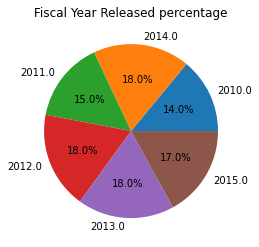

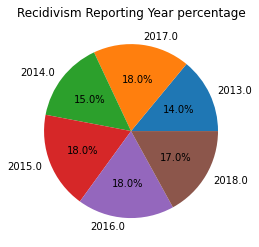

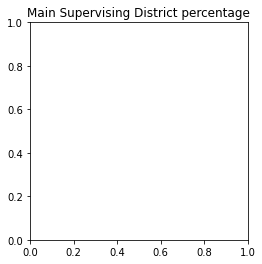

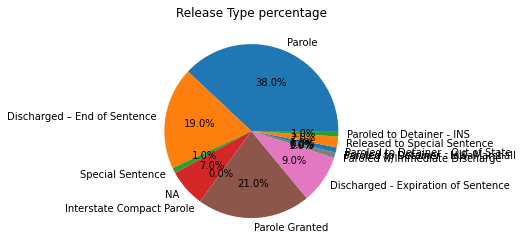

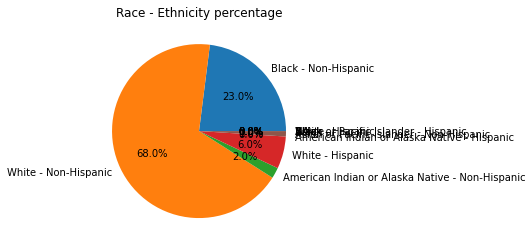

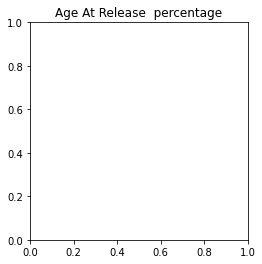

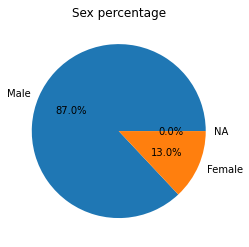

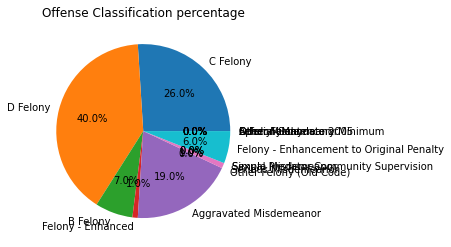

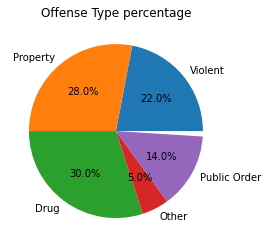

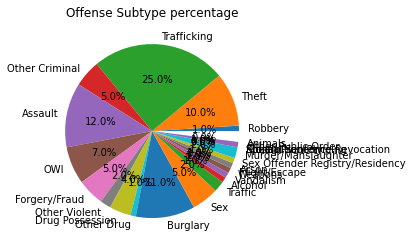

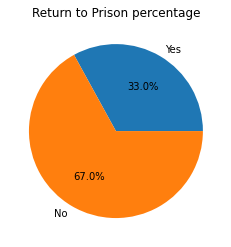

In [41]:
import plot_utils
for column_name in table.column_names:
    attributes = table.get_column(column_name, include_missing_values=True)
    grouping, names = myutils.race_grouping(attributes)
    try:
        plot_utils.pie_chart(grouping, names, column_name + " percentage")
    except:
        pass